# Imports and Setup

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
from adjustText import adjust_text

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

df_full = pd.read_csv('data/players_data-2024_2025.csv')

# Goal
To identify and analyze key patterns, performance trends, and player profiles across the top European football leagues for the 2024-2025 season.


# Data Sources
The data is sourced from: [Football Players Stats (2024-2025)](https://www.kaggle.com/datasets/hubertsidorowicz/football-players-stats-2024-2025?resource=download).
You can also find the dataset in my repository, by looking in the *data* folder.

# Data inspection

In [3]:
print("\nGeneral information about the DataFrame:")
df_full.info()

print("\nStatistical summary of the numerical columns:")
print(df_full.describe())

print("\nCount of null values ​​per column (top 20 with most nulls):")
print(df_full.isnull().sum().sort_values(ascending=False).head(20))


General information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2854 entries, 0 to 2853
Columns: 267 entries, Rk to AvgDist
dtypes: float64(111), int64(121), object(35)
memory usage: 5.8+ MB

Statistical summary of the numerical columns:
                Rk          Age         Born           MP       Starts  \
count  2854.000000  2846.000000  2846.000000  2854.000000  2854.000000   
mean   1427.500000    25.018974  1998.637034    19.024177    13.505256   
std     824.023159     4.491624     4.497922    11.510177    11.331036   
min       1.000000    15.000000  1982.000000     1.000000     0.000000   
25%     714.250000    22.000000  1996.000000     9.000000     3.000000   
50%    1427.500000    25.000000  1999.000000    20.000000    11.000000   
75%    2140.750000    28.000000  2002.000000    30.000000    23.000000   
max    2854.000000    41.000000  2008.000000    38.000000    38.000000   

               Min          90s          Gls          Ast          

# Data cleaning and subetting


In [4]:

df_full['90s'] = df_full['90s'].replace(0, np.nan)

df_full.dropna(subset=['90s'], inplace=True)

df_full['Gls_per_90'] = df_full['Gls'] / df_full['90s']
df_full['Ast_per_90'] = df_full['Ast'] / df_full['90s']
df_full['G+A_per_90'] = df_full['G+A'] / df_full['90s']
df_full['xG_per_90'] = df_full['xG'] / df_full['90s']
df_full['xA_per_90'] = df_full['xA'] / df_full['90s']
df_full['Sh_per_90'] = df_full['Sh'] / df_full['90s']
df_full['SoT_per_90'] = df_full['SoT'] / df_full['90s'] 
df_full['KP_per_90'] = df_full['KP'] / df_full['90s'] 
df_full['PrgP_per_90'] = df_full['PrgP'] / df_full['90s']
df_full['Tkl_per_90'] = df_full['Tkl'] / df_full['90s'] 
df_full['Int_per_90'] = df_full['Int'] / df_full['90s'] 
df_full['Clr_per_90'] = df_full['Clr'] / df_full['90s'] 

if 'GA_per_90' not in df_full.columns:
    df_full['GA_per_90'] = df_full['GA'] / df_full['90s']
if 'Saves_per_90' not in df_full.columns:
    df_full['Saves_per_90'] = df_full['Saves'] / df_full['90s']
if 'CS_per_90' not in df_full.columns:
    df_full['CS_per_90'] = df_full['CS'] / df_full['90s']

print("Metric columns per 90 minutes created and rows without relevant '90s' removed.")
print(df_full[['Player', '90s', 'Gls', 'Gls_per_90', 'Ast', 'Ast_per_90', 'GA', 'GA_per_90']].head())

Metric columns per 90 minutes created and rows without relevant '90s' removed.
             Player   90s  Gls  Gls_per_90  Ast  Ast_per_90  GA  GA_per_90
0        Max Aarons   1.0    0         0.0    0         0.0 NaN        NaN
1        Max Aarons   1.3    0         0.0    0         0.0 NaN        NaN
2    Rodrigo Abajas   0.7    0         0.0    0         0.0 NaN        NaN
3    James Abankwah   1.0    0         0.0    0         0.0 NaN        NaN
5  Yunis Abdelhamid  11.5    0         0.0    0         0.0 NaN        NaN


# Data Exploration
## Goal-scoring Performance
I will analyze players' goal-scoring ability from different perspectives: their efficiency per playing time, their total goal volume, and the relationship between their expected and actual goals.
### Goal-scoring Efficiency (Gls_per_90)
I identify players with the best average goals per 90 minutes, considering only those with a minimum of 720 minutes (8 90s) played to ensure statistical relevance.

Top 10 Players by Goals per 90 Minutes (minimum 8 90s played):
                  Player            Squad           Comp Pos  Gls  Gls_per_90  \
2539   Alexander Sørloth  Atlético Madrid     es La Liga  FW   20    1.149425   
2369       Patrik Schick       Leverkusen  de Bundesliga  FW   21    1.122995   
697      Ousmane Dembélé        Paris S-G     fr Ligue 1  FW   21    1.093750   
1317          Harry Kane    Bayern Munich  de Bundesliga  FW   26    0.981132   
1691       Kylian Mbappé      Real Madrid     es La Liga  FW   31    0.959752   
330         Mika Biereth           Monaco     fr Ligue 1  FW   13    0.955882   
2201       Mateo Retegui         Atalanta     it Serie A  FW   25    0.943396   
1631       Omar Marmoush   Eint Frankfurt  de Bundesliga  FW   15    0.931677   
2514    Cristhian Stuani           Girona     es La Liga  FW   11    0.916667   
1483  Robert Lewandowski        Barcelona     es La Liga  FW   27    0.912162   

       90s  
2539  17.4  
2369  18.7  
697   

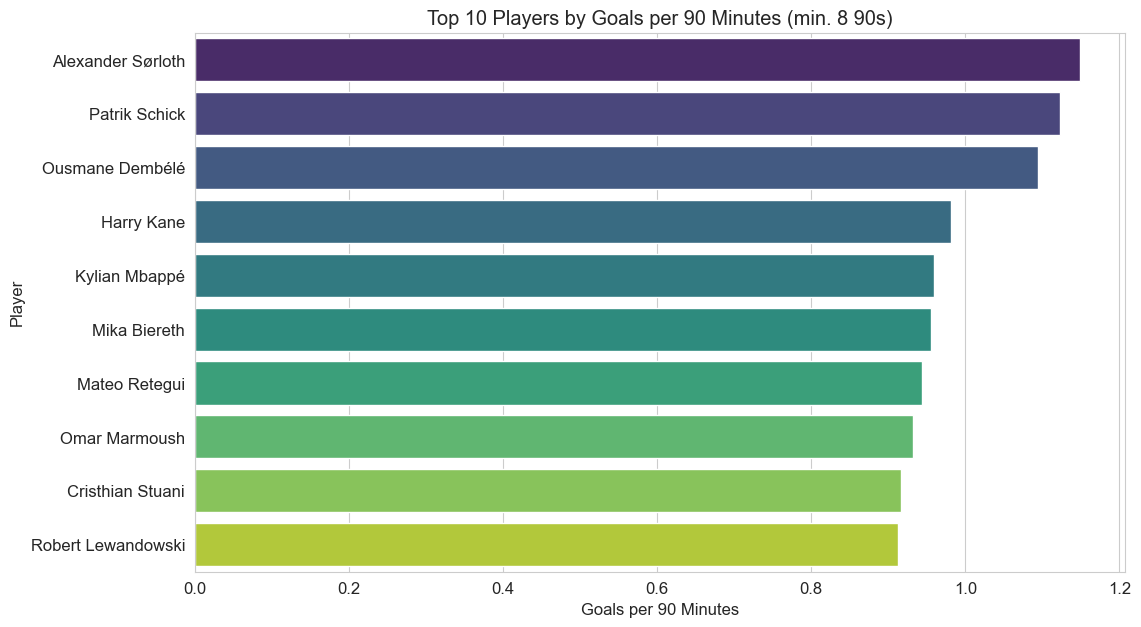

In [5]:
min_90s_goleadores = 8

df_goleadores_eficiencia = df_full[df_full['90s'] >= min_90s_goleadores].copy()

df_goleadores_eficiencia.dropna(subset=['Gls_per_90'], inplace=True)

top_scorers_efficiency = df_goleadores_eficiencia.sort_values(by='Gls_per_90', ascending=False).head(10)

print(f"Top 10 Players by Goals per 90 Minutes (minimum {min_90s_goleadores} 90s played):")
print(top_scorers_efficiency[['Player', 'Squad', 'Comp', 'Pos', 'Gls', 'Gls_per_90', '90s']])

plt.figure(figsize=(12, 7))

sns.barplot(x='Gls_per_90', y='Player', data=top_scorers_efficiency, hue='Player', palette='viridis', legend=False)

plt.title(f'Top 10 Players by Goals per 90 Minutes (min. {min_90s_goleadores} 90s)')

plt.xlabel('Goals per 90 Minutes')

plt.ylabel('Player')

plt.show()

The list of the top 10 goal-scorers per 90 minutes is exclusively comprised of forwards (FW). This highlights that goal-scoring efficiency, in terms of goals per minute played, is a fundamental characteristic of pure attacking players.

While some players like **Kylian Mbappé (32.3 90s)**, **Robert Lewandowski (29.6 90s)**, **Harry Kane (26.5 90s)**, and **Mateo Retegui (26.5 90s)** maintain high scoring efficiency over a significant volume of minutes, others such as **Mika Biereth (13.6 90s)** and **Cristhian Stuani (12.0 90s)** also feature in the top 10 with fewer 90s played. This suggests their ability to score is exceptional when they are on the field, even if they haven't accumulated an overwhelming amount of minutes.

We can observe how players with a lower total number of goals (**Stuani with 11 goals in 12 90s**) can still have a comparable or even higher *Gls_per_90* ratio than players with many more goals but also more minutes (**Lewandowski with 27 goals in 29.6 90s**). The *Gls_per_90* metric standardizes performance, allowing for a fair comparison.

### Total Goals (Gls Total)
I identify the 10 players who have scored the highest total number of goals so far this season.


Top 10 Overall Goal-scorers (Total Goals):
                  Player            Squad                Comp    Pos  Gls  \
1691       Kylian Mbappé      Real Madrid          es La Liga     FW   31   
2304       Mohamed Salah        Liverpool  eng Premier League     FW   29   
1483  Robert Lewandowski        Barcelona          es La Liga     FW   27   
1317          Harry Kane    Bayern Munich       de Bundesliga     FW   26   
2201       Mateo Retegui         Atalanta          it Serie A     FW   25   
1219      Alexander Isak    Newcastle Utd  eng Premier League     FW   23   
1109      Erling Haaland  Manchester City  eng Premier League     FW   22   
2369       Patrik Schick       Leverkusen       de Bundesliga     FW   21   
1060     Mason Greenwood        Marseille          fr Ligue 1  FW,MF   21   
697      Ousmane Dembélé        Paris S-G          fr Ligue 1     FW   21   

       90s  
1691  32.3  
2304  37.5  
1483  29.6  
1317  26.5  
2201  26.5  
1219  30.6  
1109  30.4  
2369

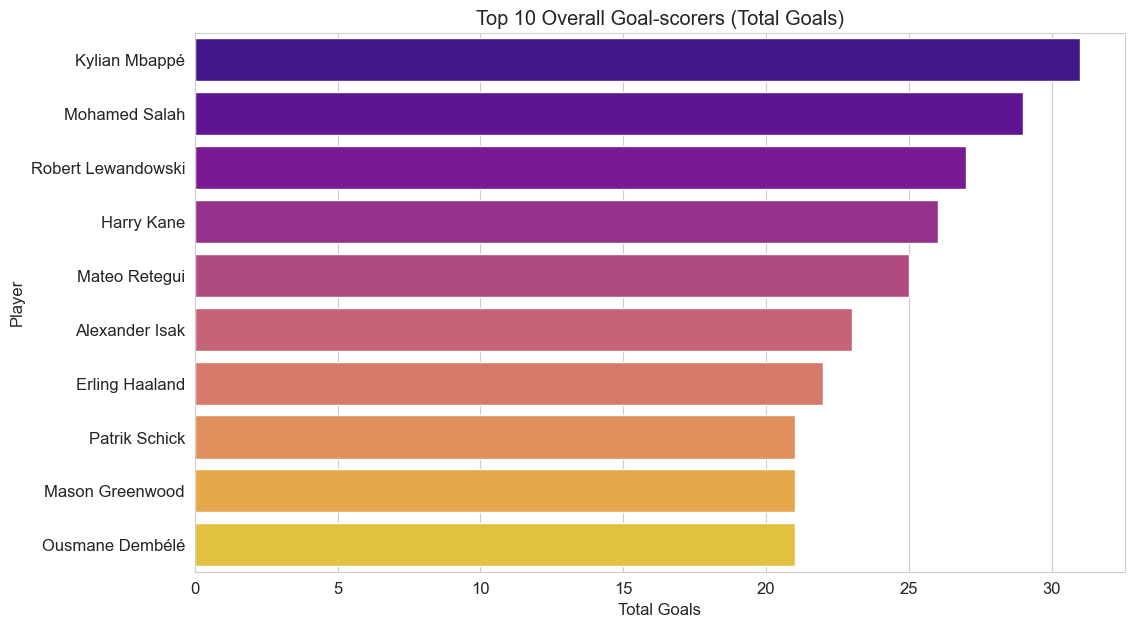

In [6]:
# Ensure 'Gls' column does not have NaNs for this part
df_full.dropna(subset=['Gls'], inplace=True)

top_total_scorers = df_full.sort_values(by='Gls', ascending=False).head(10)

print("\nTop 10 Overall Goal-scorers (Total Goals):")
print(top_total_scorers[['Player', 'Squad', 'Comp', 'Pos', 'Gls', '90s']])

plt.figure(figsize=(12, 7))
sns.barplot(x='Gls', y='Player', data=top_total_scorers, hue='Player', palette='plasma', legend=False)
plt.title('Top 10 Overall Goal-scorers (Total Goals)')
plt.xlabel('Total Goals')
plt.ylabel('Player')
plt.show()

Unlike the *Gls_per_90* analysis, where efficiency per minute could highlight players with fewer minutes, this list prioritizes the raw number of goals, which favors players who are not only efficient but also have a high volume of participation.

Most of the players on this list have accumulated a significant number of minutes (90s). For instance, **Mohamed Salah (37.5 90s)**, **Kylian Mbappé (32.3 90s)**, **Mason Greenwood (31.2 90s)**, **Alexander Isak (30.6 90s)**, and **Erling Haaland (30.4 90s)** demonstrate that consistency and availability throughout the season are crucial factors for achieving a high total goal count.

While most are strictly **forwards (FW)**, **Mason Greenwood** appears as **FW,MF**. This indicates a certain positional flexibility among some of the top scorers, although their primary role remains offensive.

It's interesting to compare this list with the *Gls_per_9*0 one. Players like **Patrik Schick (18.7 90s)** and **Ousmane Dembélé (19.2 90s)** appear on both lists, indicating that they are not only efficient but have also achieved a good total volume of goals despite not playing the absolute maximum number of minutes.

### Gls vs. xG Analysis
I compare forwards' goals scored with their expected goals (xG) to evaluate their finishing ability. A positive difference (Gls > xG) suggests a great finisher, while a negative difference (Gls < xG) could indicate bad luck or finishing issues.

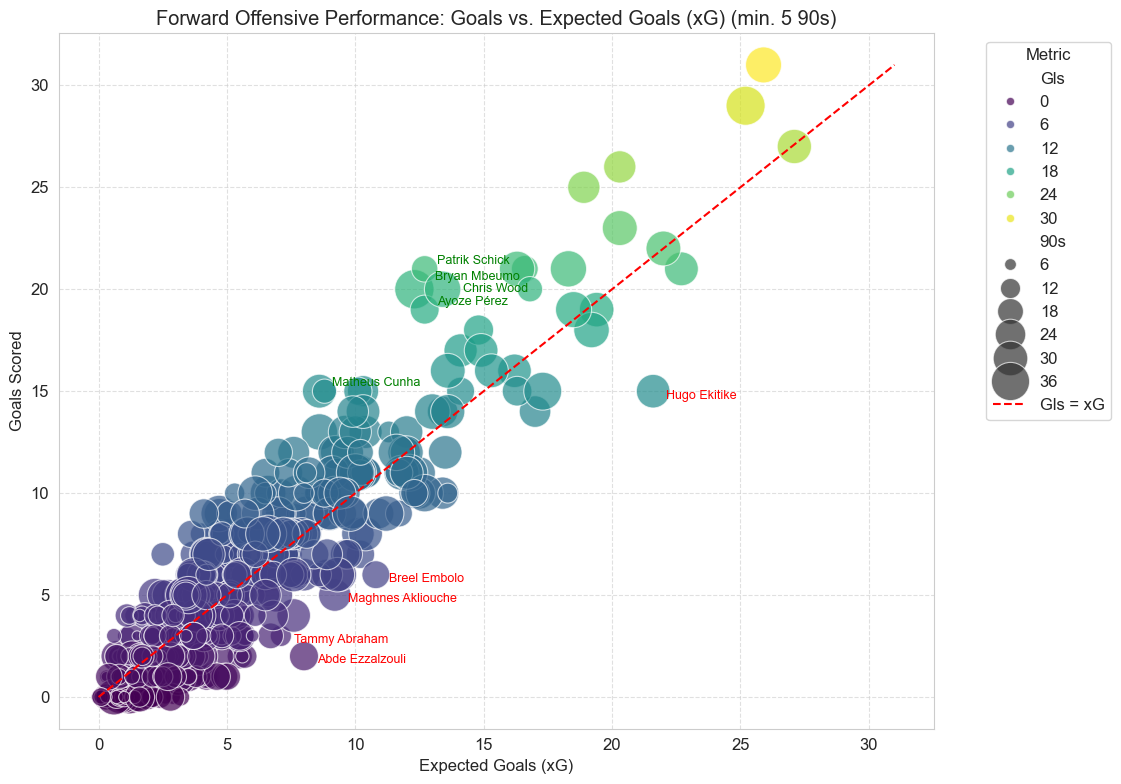

In [13]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

df_full = pd.read_csv('data/players_data-2024_2025.csv')

min_90s_fw = 5

df_fw = df_full[df_full['Pos'].str.contains('FW', na=False)].copy()

df_fw_filtered = df_fw[df_fw['90s'] >= min_90s_fw].copy()

df_fw_filtered.dropna(subset=['xG', 'Gls'], inplace=True)

df_fw_filtered['Gls_xG_Diff'] = df_fw_filtered['Gls'] - df_fw_filtered['xG']

plt.figure(figsize=(12, 8))

sns.scatterplot(
    x='xG',
    y='Gls',
    size='90s',
    sizes=(50, 800),
    hue='Gls',
    palette='viridis',
    data=df_fw_filtered,
    legend='brief',
    alpha=0.7
)

max_val_xg_gls = max(df_fw_filtered['xG'].max(), df_fw_filtered['Gls'].max())
plt.plot([0, max_val_xg_gls], [0, max_val_xg_gls], color='red', linestyle='--', label='Gls = xG')

plt.title(f'Forward Offensive Performance: Goals vs. Expected Goals (xG) (min. {min_90s_fw} 90s)')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Goals Scored')

num_players_to_label = 5

top_overperformers = df_fw_filtered.nlargest(num_players_to_label, 'Gls_xG_Diff')
top_underperformers = df_fw_filtered.nsmallest(num_players_to_label, 'Gls_xG_Diff')

players_to_label_fw = pd.concat([top_overperformers, top_underperformers]).drop_duplicates()

for i, row in players_to_label_fw.iterrows():
    x_offset = 0.5
    y_offset = 0.1

    if row['Player'] == 'Bryan Mbeumo':
        x_offset = 0.8
        y_offset = 0.3
    elif row['Player'] == 'Chris Wood':
        x_offset = 0.8
        y_offset = -0.3
    elif row['Player'] == 'Mika Biereth':
        x_offset = 0.8
        y_offset = 0.2
    elif row['Player'] == 'Omar Marmoush':
        x_offset = 0.8
        y_offset = -0.2

    if row['Gls_xG_Diff'] > 0:
        text_color = 'green'
        ha = 'left'
        va = 'bottom'
    else:
        text_color = 'red'
        ha = 'left'
        va = 'top'

    plt.text(row['xG'] + x_offset, row['Gls'] + y_offset,
             row['Player'],
             fontsize=9,
             color=text_color,
             ha=ha,
             va=va)

plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.show()

Players found above the red '*Gls = xG*' line (meaning a positive Gls_xG_Diff, colored green on the graph) are those who have scored more goals than would be expected based on the quality of their chances. This suggests they are elite finishers, capable of converting low-probability opportunities, or that their shot-selection decisions are exceptional. They are considered '*clinical*' players.

Players like **Bryan Mbeumo** also demonstrate an ability to outperform their xG, which is a clear sign of efficient finishing.

Players below the red line (colored red) have scored fewer goals than would be expected given the quality of their chances (*xG*). This could indicate bad luck (hitting the post many times, incredible goalkeeper saves) or genuine issues with their finishing ability.

**Breel Embolo** is an example of an *underperforming* player. Despite generating a considerable amount of xG, his actual goals scored are significantly lower

## Assisting Performance
I analyze players' ability to create goal-scoring opportunities, both in terms of efficiency per playing time and total assist volume, and how these metrics are distributed by league.

### Assisting Efficiency (Ast_per_90)
I identify players with the best average assists per 90 minutes, applying the same threshold of 8 90s played to ensure relevance.

Top 10 Players by Assists per 90 Minutes (minimum 8 90s played):
                 Player           Squad                Comp    Pos  Ast  \
1960      Michael Olise   Bayern Munich       de Bundesliga  FW,MF   15   
1631      Omar Marmoush  Eint Frankfurt       de Bundesliga     FW    9   
2299        Bukayo Saka         Arsenal  eng Premier League  FW,MF   10   
2612      Ferrán Torres       Barcelona          es La Liga  FW,MF    6   
541        Rayan Cherki            Lyon          fr Ligue 1  FW,MF   11   
2304      Mohamed Salah       Liverpool  eng Premier League     FW   18   
2023  Exequiel Palacios      Leverkusen       de Bundesliga     MF    6   
1221               Isco           Betis          es La Liga     MF    8   
2779      Florian Wirtz      Leverkusen       de Bundesliga  MF,FW   12   
1830       Jacob Murphy   Newcastle Utd  eng Premier League     FW   12   

      Ast_per_90   90s  
1960    0.579151  25.9  
1631    0.559006  16.1  
2299    0.520833  19.2  
2612    0

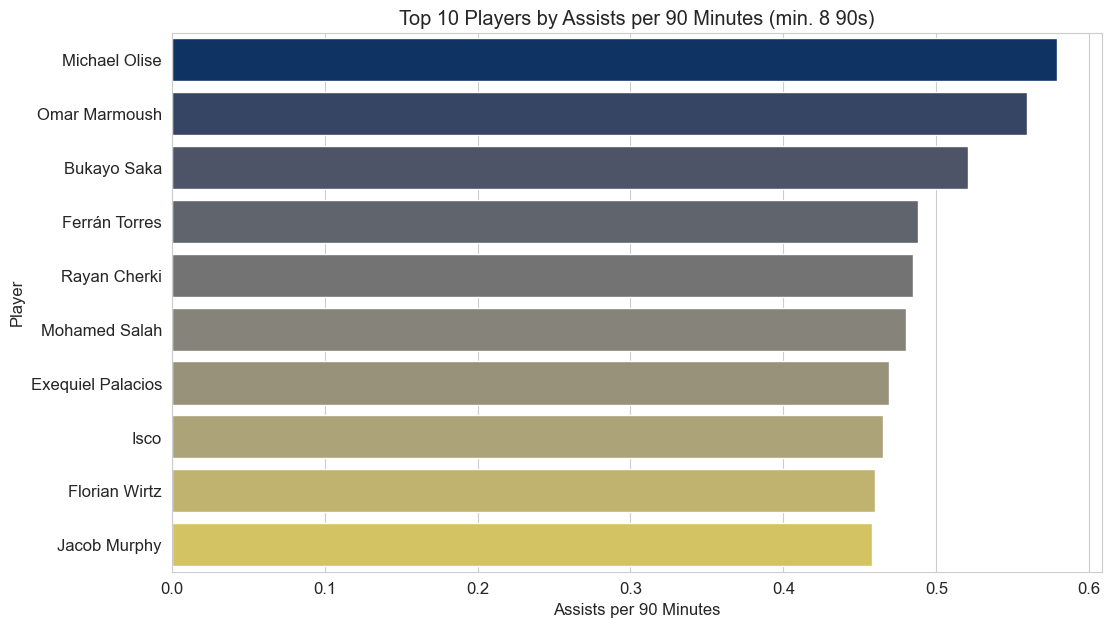

In [14]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

df_full = pd.read_csv('data/players_data-2024_2025.csv')
df_full['Ast_per_90'] = df_full['Ast'] / df_full['90s']
df_full.replace([np.inf, -np.inf], np.nan, inplace=True)

min_90s_assisters = 8

df_assisters_efficiency = df_full[df_full['90s'] >= min_90s_assisters].copy()
df_assisters_efficiency.dropna(subset=['Ast_per_90'], inplace=True) # Now 'Ast_per_90' should exist

top_assisters_efficiency = df_assisters_efficiency.sort_values(by='Ast_per_90', ascending=False).head(10)

print(f"Top 10 Players by Assists per 90 Minutes (minimum {min_90s_assisters} 90s played):")
print(top_assisters_efficiency[['Player', 'Squad', 'Comp', 'Pos', 'Ast', 'Ast_per_90', '90s']])

plt.figure(figsize=(12, 7))
sns.barplot(x='Ast_per_90', y='Player', data=top_assisters_efficiency, hue='Player', palette='cividis', legend=False)
plt.title(f'Top 10 Players by Assists per 90 Minutes (min. {min_90s_assisters} 90s)')
plt.xlabel('Assists per 90 Minutes')
plt.ylabel('Player')
plt.show()

Unlike goal-scoring efficiency (*Gls_per_90*), which was dominated by pure forwards (*FW*), this list of the top 10 assisters per 90 minutes shows greater positional diversity. We see:

**FW, MF (Forward and Midfielder)**: Michael Olise, Bukayo Saka, Ferrán Torres, Rayan Cherki, Florian Wirtz.

**FW (Forward)**: Omar Marmoush, Mohamed Salah, Jacob Murphy.

**MF (Midfielder)**: Exequiel Palacios, Isco.

We observe players with a high volume of minutes (*high 90s*) who maintain excellent efficiency, such as **Michael Olise (25.9 90s)**, **Mohamed Salah (37.5 90s)**, **Florian Wirtz (26.1 90s)**, and **Jacob Murphy (26.2 90s)**. This highlights their consistency and their central role in playmaking for their teams.

### Total Assists (Ast Totales)
I identify the 10 players who have provided the highest total number of assists so far this season.


Top 10 Overall Assisters (Total Assists):
                Player            Squad                Comp    Pos  Ast   90s
2304     Mohamed Salah        Liverpool  eng Premier League     FW   18  37.5
1960     Michael Olise    Bayern Munich       de Bundesliga  FW,MF   15  25.9
2792      Lamine Yamal        Barcelona          es La Liga     FW   13  31.7
1830      Jacob Murphy    Newcastle Utd  eng Premier League     FW   12  26.2
2779     Florian Wirtz       Leverkusen       de Bundesliga  MF,FW   12  26.1
1064    Vincenzo Grifo         Freiburg       de Bundesliga  FW,MF   11  27.0
829     Anthony Elanga  Nott'ham Forest  eng Premier League  FW,MF   11  27.8
2099     Gaëtan Perrin          Auxerre          fr Ligue 1  MF,FW   11  29.9
541       Rayan Cherki             Lyon          fr Ligue 1  FW,MF   11  22.7
651   Mikkel Damsgaard        Brentford  eng Premier League  MF,FW   10  32.3


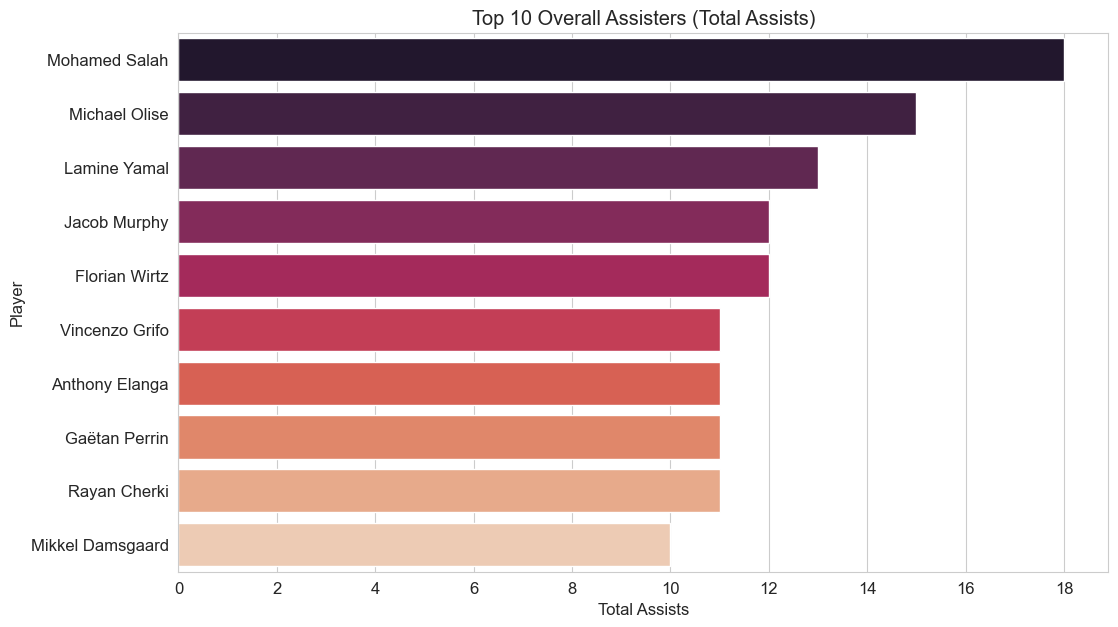

In [15]:
df_full.dropna(subset=['Ast'], inplace=True)

top_total_assisters = df_full.sort_values(by='Ast', ascending=False).head(10)

print("\nTop 10 Overall Assisters (Total Assists):")
print(top_total_assisters[['Player', 'Squad', 'Comp', 'Pos', 'Ast', '90s']])

plt.figure(figsize=(12, 7))
sns.barplot(x='Ast', y='Player', data=top_total_assisters, hue='Player', palette='rocket', legend=False)
plt.title('Top 10 Overall Assisters (Total Assists)')
plt.xlabel('Total Assists')
plt.ylabel('Player')

plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.show()

Similar to *total goals*, achieving a high number of total assists strongly correlates with playing a significant amount of minutes (*90s*). Players like **Mohamed Salah (37.5 90s)**, **Lamine Yamal (31.7 90s)**, and **Gaëtan Perrin (29.9 90s)** are at the top, indicating that consistent presence on the field is crucial for accumulating assists.

Several players from the *Ast_per_90 list* (efficiency) also appear here (*total assists*): **Mohamed Salah**, **Michael Olise**, **Florian Wirtz**, **Rayan Cherki**, **Jacob Murphy**. This signifies that these players are not only highly efficient creators when on the pitch, but they also play enough minutes to translate that efficiency into a high total volume of assists.

Conversely, some players who were highly efficient but had lower total minutes (**Omar Marmoush, Bukayo Saka, Ferrán Torres, Exequiel Palacios, Isco** from the *Ast_per_90 list*) do not appear in this "*total assists*" list, as their cumulative assist count (6-10 assists) is lower than the cut-off for the top 10 overall. This reinforces the distinction between efficiency and total volume.

### Ast vs. xA Analysis
I analyze the relationship between actual assists (Ast) and expected assists (xA) to evaluate players' ability to convert goal-scoring opportunities into real assists.

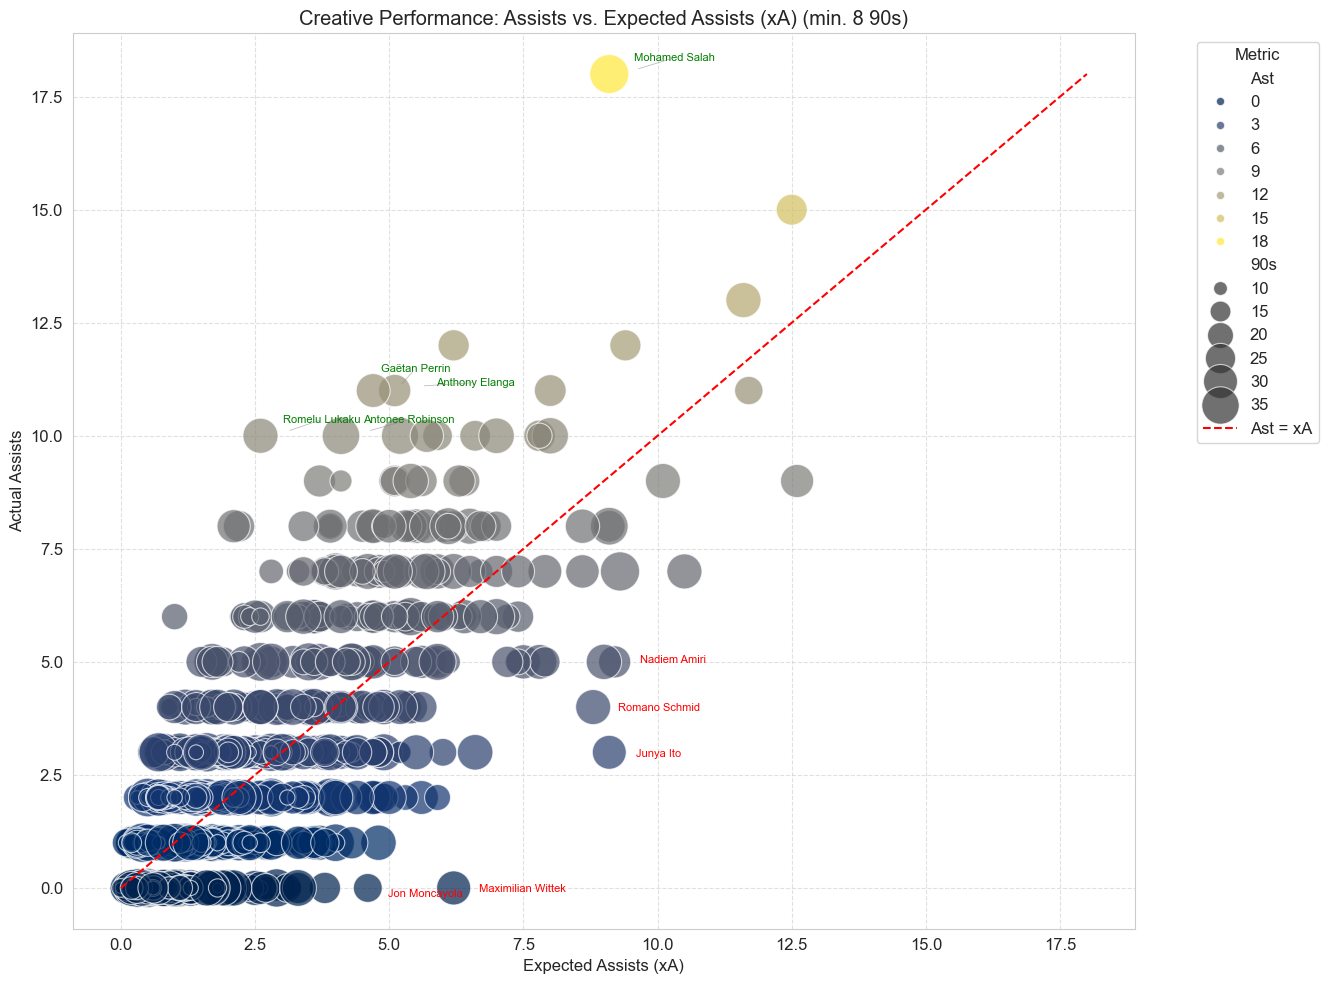

In [32]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

try:
    df_full = pd.read_csv('data/players_data-2024_2025.csv')
except FileNotFoundError:
    print("Error: El archivo 'data/players_data-2024_2025.csv' no se encontró.")
    print("Por favor, asegúrate de que la ruta al archivo CSV sea correcta.")
    data = {'Player': [f'Player {i}' for i in range(1, 21)],
            'Pos': ['FW', 'MF', 'DF', 'FW', 'MF', 'DF', 'FW', 'MF', 'DF', 'FW', 'MF', 'DF', 'FW', 'MF', 'DF', 'FW', 'MF', 'DF', 'GK', 'GK'],
            '90s': np.random.uniform(5, 30, 20),
            'Ast': np.random.randint(0, 15, 20),
            'xA': np.random.uniform(0.5, 10, 20),
            'Gls': np.random.randint(0, 20, 20),
            'xG': np.random.uniform(0.5, 15, 20),
            'Squad': ['Team A'] * 10 + ['Team B'] * 10,
            'Comp': ['League 1'] * 20
           }
    df_full = pd.DataFrame(data)
    df_full.loc[0, ['xA', 'Ast', 'Player']] = [5.0, 7.0, 'Player A']
    df_full.loc[1, ['xA', 'Ast', 'Player']] = [5.0, 7.0, 'Player B']
    df_full.loc[2, ['xA', 'Ast', 'Player']] = [6.0, 8.0, 'Player C']
    df_full.loc[3, ['xA', 'Ast', 'Player']] = [6.0, 8.0, 'Player D']

df_full['xA'] = pd.to_numeric(df_full['xA'], errors='coerce')
df_full['Ast'] = pd.to_numeric(df_full['Ast'], errors='coerce')
df_full['90s'] = pd.to_numeric(df_full['90s'], errors='coerce')

df_field_players = df_full[~df_full['Pos'].str.contains('GK', na=False)].copy()

min_90s_xA_Ast = 8
df_field_filtered = df_field_players[df_field_players['90s'] >= min_90s_xA_Ast].copy()

df_field_filtered.dropna(subset=['xA', 'Ast'], inplace=True) 

sns.scatterplot(
    x='xA',             
    y='Ast',            
    size='90s',         
    sizes=(50, 800),
    hue='Ast',          
    palette='cividis',
    data=df_field_filtered,
    legend='brief',
    alpha=0.7
)

max_val_xa_ast = max(df_field_filtered['xA'].max(), df_field_filtered['Ast'].max())
plt.plot([0, max_val_xa_ast], [0, max_val_xa_ast], color='red', linestyle='--', label='Ast = xA')

plt.title(f'Creative Performance: Assists vs. Expected Assists (xA) (min. {min_90s_xA_Ast} 90s)')
plt.xlabel('Expected Assists (xA)')
plt.ylabel('Actual Assists')

df_field_filtered['Ast_xA_Diff'] = df_field_filtered['Ast'] - df_field_filtered['xA']
num_players_to_label_ast = 5 

top_overperformers_ast = df_field_filtered.nlargest(num_players_to_label_ast, 'Ast_xA_Diff')
top_underperformers_ast = df_field_filtered.nsmallest(num_players_to_label_ast, 'Ast_xA_Diff')

players_to_label_ast = pd.concat([top_overperformers_ast, top_underperformers_ast]).drop_duplicates(
    subset=['xA', 'Ast'], keep='first'
)

texts = []

for i, row in players_to_label_ast.iterrows():
    x_offset = 0.5
    y_offset = 0.1

    if row['Ast_xA_Diff'] > 0:
        text_color = 'green'
        ha = 'left'
        va = 'bottom'
    else:
        text_color = 'red'
        ha = 'left'
        va = 'top'

    text_obj = plt.text(row['xA'] + x_offset, row['Ast'] + y_offset,
                        row['Player'],
                        fontsize=8,
                        color=text_color,
                        ha=ha,
                        va=va)
    texts.append(text_obj)

adjust_text(texts,
            x=df_field_filtered['xA'],
            y=df_field_filtered['Ast'],
            add_objects=[plt.plot([0, max_val_xa_ast], [0, max_val_xa_ast], color='red', linestyle='--', visible=False)[0]],
            arrowprops=dict(arrowstyle='-', color='gray', lw=0.5, alpha=0.6),
            autoalign='xy',
            expand_points=(2, 2),
            expand_text=(1.2, 1.2),
            lim=100)
plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.90, 1])

plt.show()

**Mohamed Salah** is a significant overperformer *(Ast > xA)* in terms of creative output. He has a very high *xA* (meaning he consistently creates high-quality chances) and an even higher number of actual assists. His large circle indicates significant playing time *(90s)*. This suggests he is not only a fantastic chance creator but also benefits from clinical finishing by his teammates, or he himself provides exceptionally precise deliveries. He's a top-tier creative force.

**Gaëtan Perrin, Anthony Elanga, Romelu Lukaku, and Antoine Griezmann** are footballers who, despite not having as high an *xA* as **Mohamed Salah**, consistently register assists that are superior to what was expected. It's interesting to see **Romelu Lukaku** as an *overperformer* in assists, especially being a center forward, as this suggests a very participatory facet of his game.

**Jon Moncayola and Maximilian** Wittek are players who show performance below their *xA*, although within lower *xA* and *Ast* ranges. This reinforces the idea that they are generating opportunities, but for some reason (such as teammate finishing) these are not translating into assists.

### Assist Contribution by League
I visualize the total assists contributed by each league in the season, complementing the analysis of goal-scoring contribution.


Total Assists by League (2024-2025 Season):
Comp
eng Premier League    804
es La Liga            673
de Bundesliga         671
it Serie A            669
fr Ligue 1            612
Name: Ast, dtype: int64


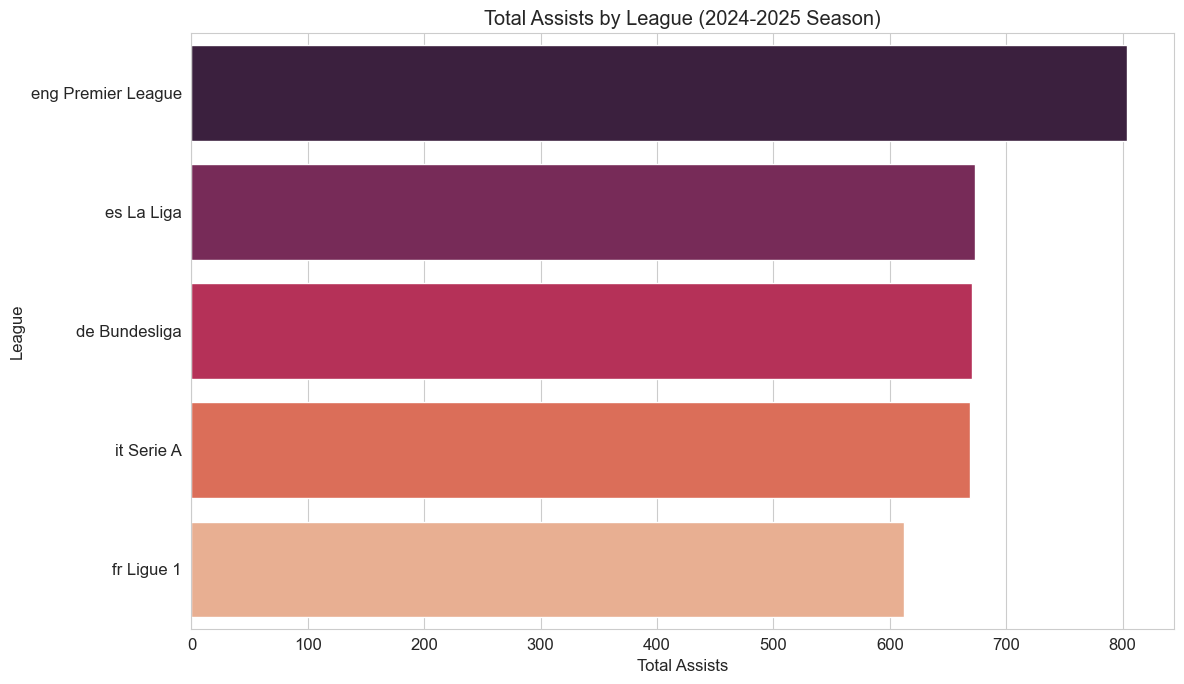

In [18]:
total_assists_by_league = df_full.groupby('Comp')['Ast'].sum().sort_values(ascending=False)

print("\nTotal Assists by League (2024-2025 Season):")
print(total_assists_by_league)

plt.figure(figsize=(12, 7))
sns.barplot(x=total_assists_by_league.values, y=total_assists_by_league.index, hue=total_assists_by_league.index, palette='rocket', legend=False)
plt.title('Total Assists by League (2024-2025 Season)')
plt.xlabel('Total Assists')
plt.ylabel('League')
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

The **English Premier League** appears to be the most *assist-rich* league among the Big Five in the 2024-2025 season, leading by a comfortable margin. **La Liga, Bundesliga, and Serie A** are highly competitive and very similar in their total assist output, while **Ligue 1** lags behind the others, indicating a potentially different dynamic in terms of assist generation.

# Goalkeeper Analysis
Goalkeepers are a specialized position, and their performance is evaluated using distinct metrics. I will focus on their save efficiency, impact on goals conceded, and playing style.

In [176]:
df_gk = df_full[df_full['Pos'].str.contains('GK', na=False)].copy()

df_gk_filtered = df_gk[df_gk['90s'] >= min_90s_gk_analysis].copy()

df_gk_filtered.dropna(subset=['Save%', 'GA_per_90', 'SoT'], inplace=True)

print(f"Number of goalkeepers analyzed (minimum {min_90s_gk_analysis} 90s): {len(df_gk_filtered)}")
print("First rows of the filtered goalkeepers DataFrame with key metrics:")
print(df_gk_filtered[['Player', 'Squad', 'Comp', '90s', 'GA_per_90', 'Save%', 'Saves_per_90', 'CS', 'CS_per_90', '#OPA/90', 'Launch%', 'AvgLen']].head())

Number of goalkeepers analyzed (minimum 5 90s): 155
First rows of the filtered goalkeepers DataFrame with key metrics:
                 Player          Squad                Comp   90s  GA_per_90  \
33               Adrián          Betis          es La Liga  19.0   1.421053   
42   Julen Agirrezabala  Athletic Club          es La Liga  13.4   0.671642   
87              Alisson      Liverpool  eng Premier League  27.9   1.039427   
147     Alphonse Areola       West Ham  eng Premier League  25.1   1.633466   
160   Kepa Arrizabalaga    Bournemouth  eng Premier League  31.0   1.258065   

     Save%  Saves_per_90   CS  CS_per_90  #OPA/90  Launch%  AvgLen  
33    65.8      2.578947  3.0   0.157895     0.84     28.0    31.2  
42    76.5      1.791045  5.0   0.373134     1.27     37.5    33.9  
87    72.0      2.616487  9.0   0.322581     1.76     19.7    26.6  
147   64.3      3.067729  5.0   0.199203     1.19     34.4    32.1  
160   73.9      3.064516  8.0   0.258065     1.74     33.2   

### Save Efficiency (Save%, GA_per_90)
I visualize goalkeepers with the best save percentage and the lowest average goals conceded per 90 minutes.

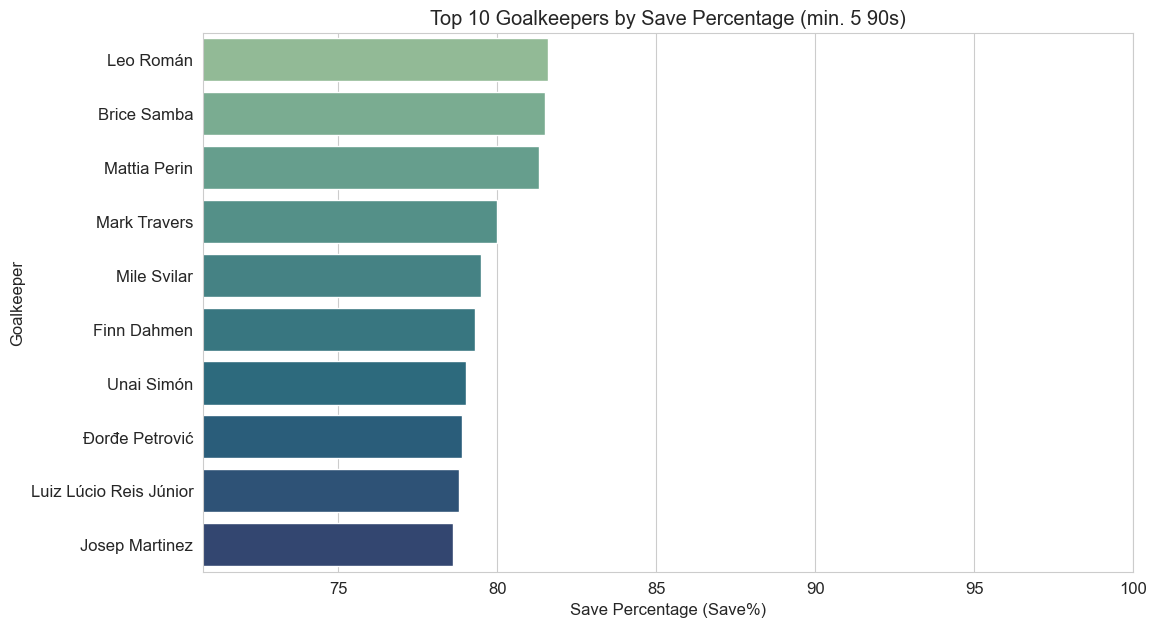

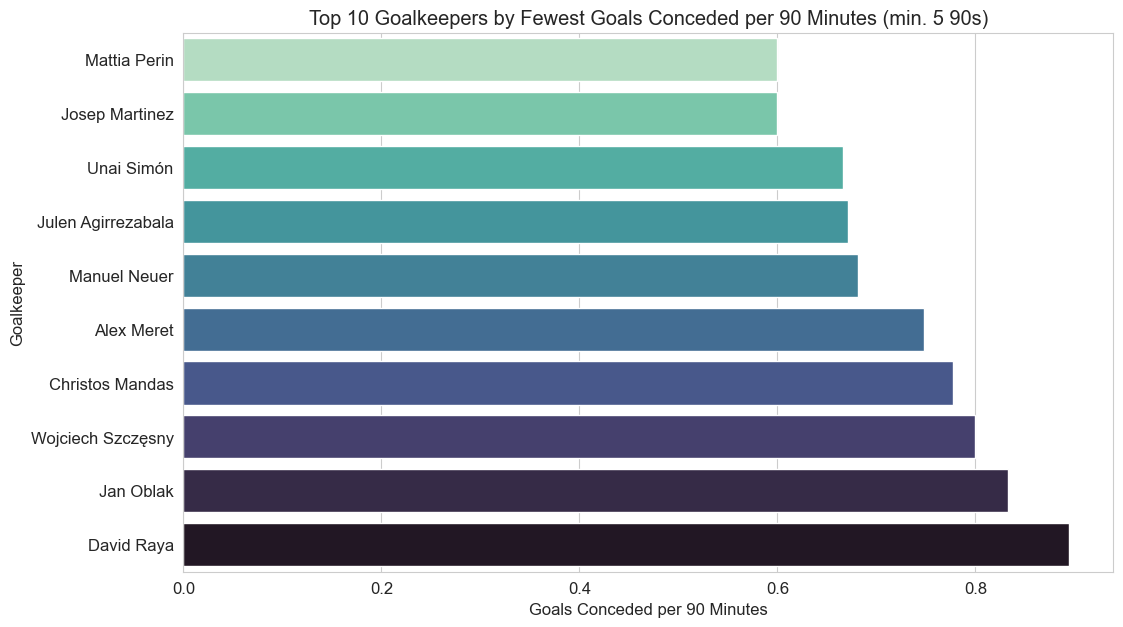

In [ ]:
top_gk_saves = df_gk_filtered.sort_values(by='Save%', ascending=False).head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x='Save%', y='Player', data=top_gk_saves, hue='Player', palette='crest', legend=False)
plt.title(f'Top 10 Goalkeepers by Save Percentage (min. {min_90s_gk_analysis} 90s)')
plt.xlabel('Save Percentage (Save%)')
plt.ylabel('Goalkeeper')
plt.xlim(top_gk_saves['Save%'].min() * 0.9, 100)
plt.show()

top_gk_ga90 = df_gk_filtered.sort_values(by='GA_per_90', ascending=True).head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x='GA_per_90', y='Player', data=top_gk_ga90, hue='Player', palette='mako_r', legend=False)<
plt.title(f'Top 10 Goalkeepers by Fewest Goals Conceded per 90 Minutes (min. {min_90s_gk_analysis} 90s)')
plt.xlabel('Goals Conceded per 90 Minutes')
plt.ylabel('Goalkeeper')
plt.show()

**Unai Simón and Mattia Perin** appear in both top 10 lists, suggesting they are well-rounded goalkeepers who are excellent at both stopping shots *(Save%)* and preventing goals *(GA_per_90)*.

Some goalkeepers excel more in one area than another. For instance, **Leo Román** is top for *Save%* but isn't shown in the top *GA/90* list, implying he makes great saves but perhaps plays for a team that allows more shots, leading to a higher *GA/90* despite his individual brilliance. Conversely, **David Raya** is top for *GA/90* but isn't in the *Save%* top 10, potentially indicating a very strong defense in front of him limiting shots on target, or that while he concedes few, his save rate for the shots he faces isn't among the absolute elite.

### SoT vs. Save% Comparison
I visualize the relationship between the number of shots on target faced (SoT) and the save percentage (Save%), to contextualize goalkeeper performance.


Number of goalkeepers analyzed (minimum 8 90s): 129
First rows of the filtered goalkeepers DataFrame with key metrics:
                 Player          Squad                Comp   90s  Save%  \
33               Adrián          Betis          es La Liga  19.0   65.8   
42   Julen Agirrezabala  Athletic Club          es La Liga  13.4   76.5   
87              Alisson      Liverpool  eng Premier League  27.9   72.0   
147     Alphonse Areola       West Ham  eng Premier League  25.1   64.3   
160   Kepa Arrizabalaga    Bournemouth  eng Premier League  31.0   73.9   

     #OPA/90  Launch%  AvgLen  
33      0.84     28.0    31.2  
42      1.27     37.5    33.9  
87      1.76     19.7    26.6  
147     1.19     34.4    32.1  
160     1.74     33.2    32.9  


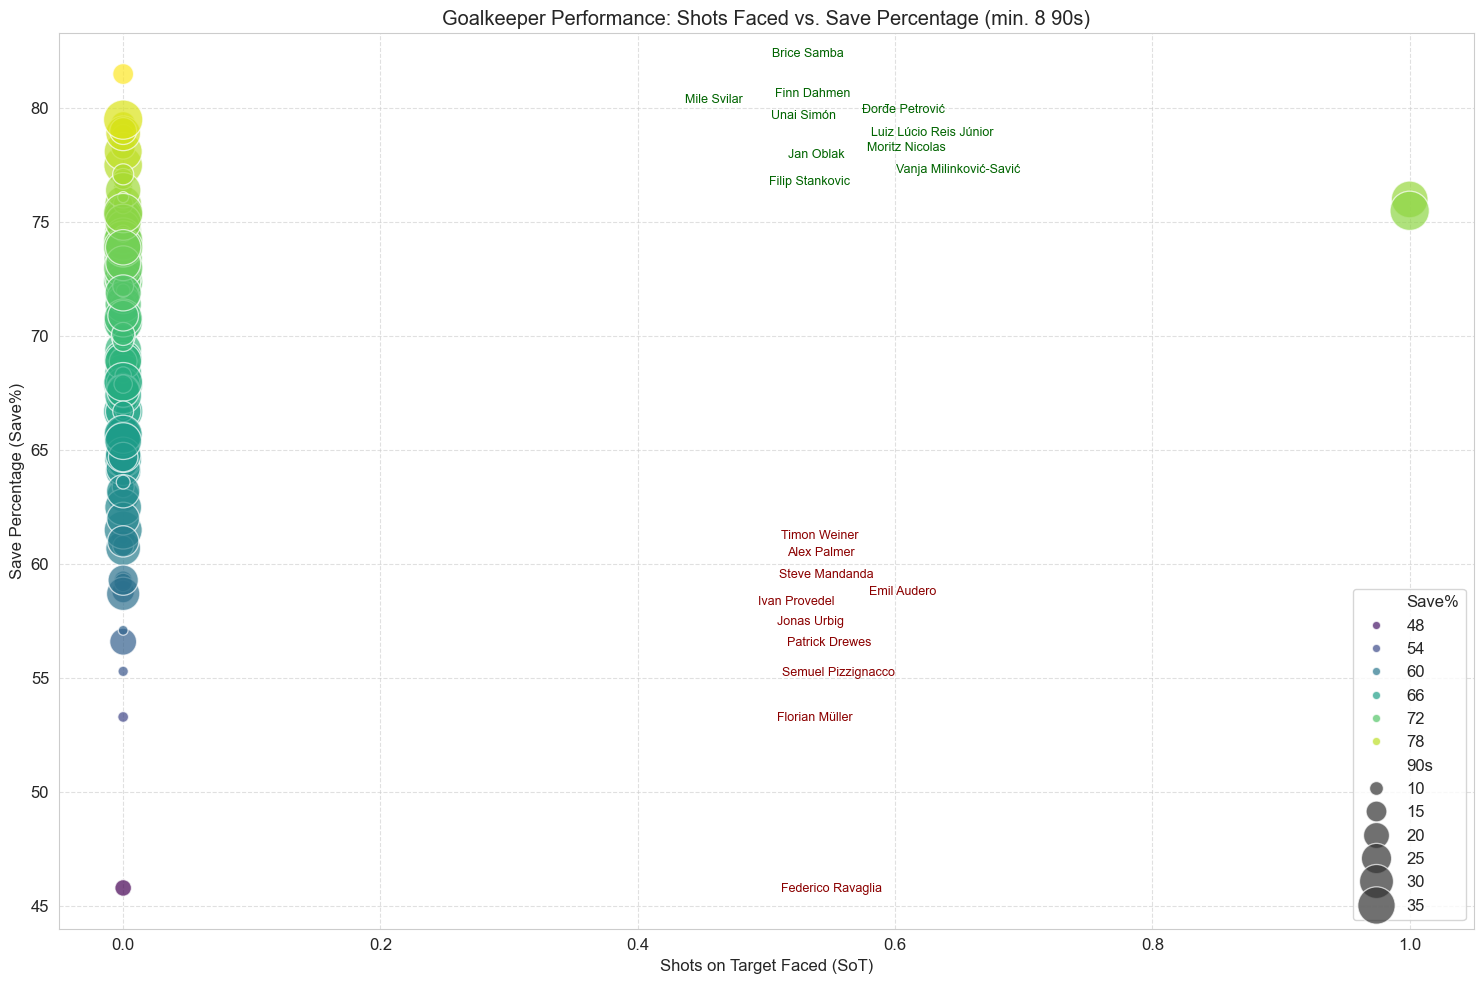

In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10) 
plt.rcParams['font.size'] = 12

try:
    df_full = pd.read_csv('data/players_data-2024_2025.csv')
except FileNotFoundError:
    print("Error: El archivo 'data/players_data-2024_2025.csv' no se encontró.")
    print("Por favor, asegúrate de que la ruta al archivo CSV sea correcta.")
    data = {'Player': [f'Player {i}' for i in range(1, 201)],
            'Pos': ['FW', 'MF', 'DF', 'GK'] * 50,
            '90s': np.random.uniform(5, 35, 200),
            'Ast': np.random.randint(0, 15, 200),
            'xA': np.random.uniform(0.5, 10, 200),
            'Gls': np.random.randint(0, 20, 200),
            'xG': np.random.uniform(0.5, 15, 200),
            'Squad': [f'Team {chr(65 + i)}' for i in range(20)] * 10,
            'Comp': ['League 1'] * 200,
            'Save%': np.random.uniform(45, 85, 200),
            'SoT': np.random.uniform(10, 100, 200), 
            '#OPA/90': np.random.uniform(0.1, 2.5, 200),
            'Launch%': np.random.uniform(10, 80, 200),
            'AvgLen': np.random.uniform(20, 50, 200)
           }
    df_full = pd.DataFrame(data)

df_full['90s'] = pd.to_numeric(df_full['90s'], errors='coerce')
df_full['Save%'] = pd.to_numeric(df_full['Save%'], errors='coerce')
df_full['SoT'] = pd.to_numeric(df_full['SoT'], errors='coerce')

df_gk = df_full[df_full['Pos'].str.contains('GK', na=False)].copy()

min_90s_gk_analysis = 8 
df_gk_filtered = df_gk[df_gk['90s'] >= min_90s_gk_analysis].copy()

df_gk_filtered.dropna(subset=['Save%', 'SoT'], inplace=True)

print(f"\nNumber of goalkeepers analyzed (minimum {min_90s_gk_analysis} 90s): {len(df_gk_filtered)}")
print("First rows of the filtered goalkeepers DataFrame with key metrics:")

print(df_gk_filtered[['Player', 'Squad', 'Comp', '90s', 'Save%', '#OPA/90', 'Launch%', 'AvgLen']].head())


plt.figure(figsize=(15, 10))

sns.scatterplot(
    x='SoT',
    y='Save%',
    size='90s',
    sizes=(50, 800),
    hue='Save%',
    palette='viridis',
    data=df_gk_filtered,
    legend='brief',
    alpha=0.7
)

plt.title(f'Goalkeeper Performance: Shots Faced vs. Save Percentage (min. {min_90s_gk_analysis} 90s)')
plt.xlabel('Shots on Target Faced (SoT)')
plt.ylabel('Save Percentage (Save%)')

num_players_to_label = 10

top_gk_labels = df_gk_filtered.sort_values(by=['Save%', 'SoT'], ascending=[False, False]).head(num_players_to_label)

worst_gk_labels = df_gk_filtered.sort_values(by=['Save%'], ascending=[True]).head(num_players_to_label)

players_to_label_gk = pd.concat([top_gk_labels, worst_gk_labels]).drop_duplicates(subset=['Player']).copy()

texts_gk = [] 
for i, row in players_to_label_gk.iterrows():
    x_offset = 0.5
    y_offset = 0.1
    font_size = 9
    
    if row['Player'] in top_gk_labels['Player'].values:
        text_color = 'darkgreen'
    elif row['Player'] in worst_gk_labels['Player'].values:
        text_color = 'darkred'
    else:
        text_color = 'black'
    
    text_obj = plt.text(row['SoT'] + x_offset, row['Save%'] + y_offset,
                        row['Player'],
                        fontsize=font_size,
                        color=text_color,
                        ha='left',
                        va='center')
    texts_gk.append(text_obj)

adjust_text(texts_gk,
            x=df_gk_filtered['SoT'],
            y=df_gk_filtered['Save%'],
            autoalign='xy',
            expand_points=(2, 2),
            expand_text=(1.2, 1.2),
            lim=100)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

High-performing goalkeepers are reaffirmed as those with a consistently high *Save%* (above 75-80%), covering a low to medium-high volume of SoT. Notable examples include **Brice Samba, Finn Dahmen, Mile Svilar, Unai Simón, or Jan Oblak**. This indicates that they are very effective at stopping shots.

Afterwards, we can see goalkeepers identified with a considerably lower *Save%* (below 65%, some even close to 45-50%). These names include **Steve Mandanda, Ivan Provedel, Jonas Urbig, Patrick Drewes, Samuel Pizzignacco, Florian Müller, and Federico Ravaglia**. Their presence at the bottom of the graph confirms that they have difficulties stopping a high percentage of the shots they face.

It is interesting to note that among the worst-performing goalkeepers, some face a low number of SoT (for example, **Federico Ravaglia**), which suggests that even with few opportunities, their *Save%* is low.

### Playing Style (Distribution, #OPA/90, Launch%)
I explore distribution metrics and out-of-penalty-area actions to understand goalkeepers' playing styles.



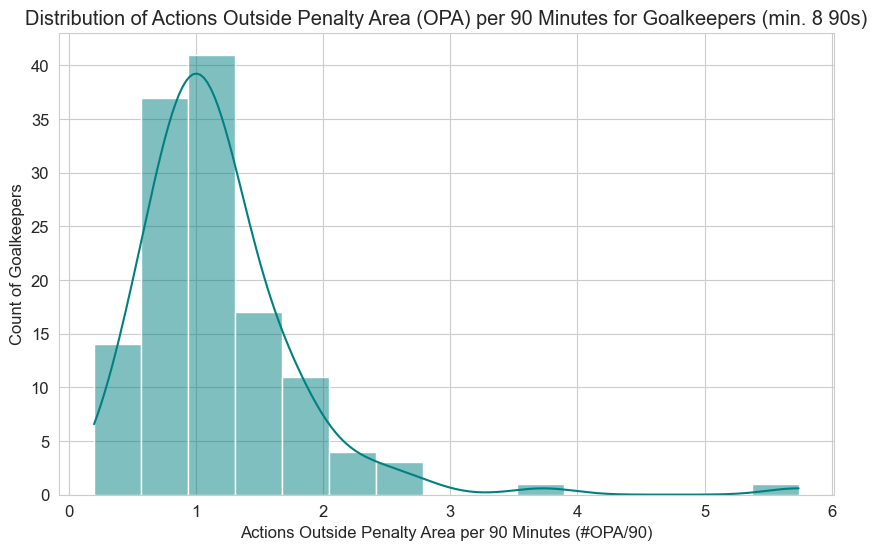

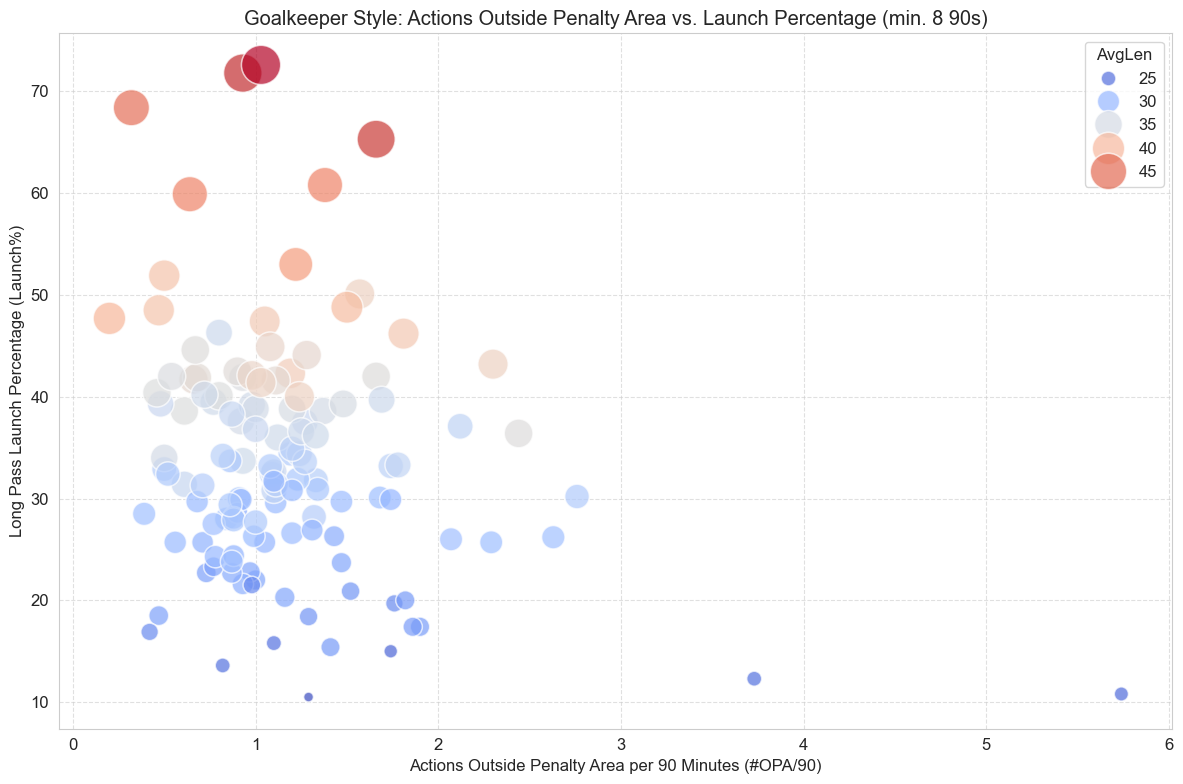

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(df_gk_filtered['#OPA/90'], bins=15, kde=True, color='teal')
plt.title(f'Distribution of Actions Outside Penalty Area (OPA) per 90 Minutes for Goalkeepers (min. {min_90s_gk_analysis} 90s)')
plt.xlabel('Actions Outside Penalty Area per 90 Minutes (#OPA/90)')
plt.ylabel('Count of Goalkeepers')
plt.show()

df_gk_filtered.dropna(subset=['Launch%', 'AvgLen'], inplace=True)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='#OPA/90',
    y='Launch%',
    size='AvgLen',
    sizes=(50, 800),
    hue='AvgLen',
    palette='coolwarm',
    data=df_gk_filtered,
    legend='brief',
    alpha=0.7
)
plt.title(f'Goalkeeper Style: Actions Outside Penalty Area vs. Launch Percentage (min. {min_90s_gk_analysis} 90s)')
plt.xlabel('Actions Outside Penalty Area per 90 Minutes (#OPA/90)')
plt.ylabel('Long Pass Launch Percentage (Launch%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Most goalkeepers have between 0.5 and 1.5 actions outside the penalty area per 90s, which means that few goalkeepers perform a very high number of these actions.

There is a high concentration of goalkeepers with low *#OPA/90* and low *Launch%*. These goalkeepers do not leave their area much and prefer short passes (low *AvgLen*).

A handful of goalkeepers combine a high *#OPA/*90* with a high *Launch%* and *AvgLen*. These are *sweeper-keepers* who also initiate play with long, direct balls, contributing to the attack.

# Distribution of Gls_per_90 by Position
I compare the distribution of goals among different positions on the football (soccer) field.

c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` with

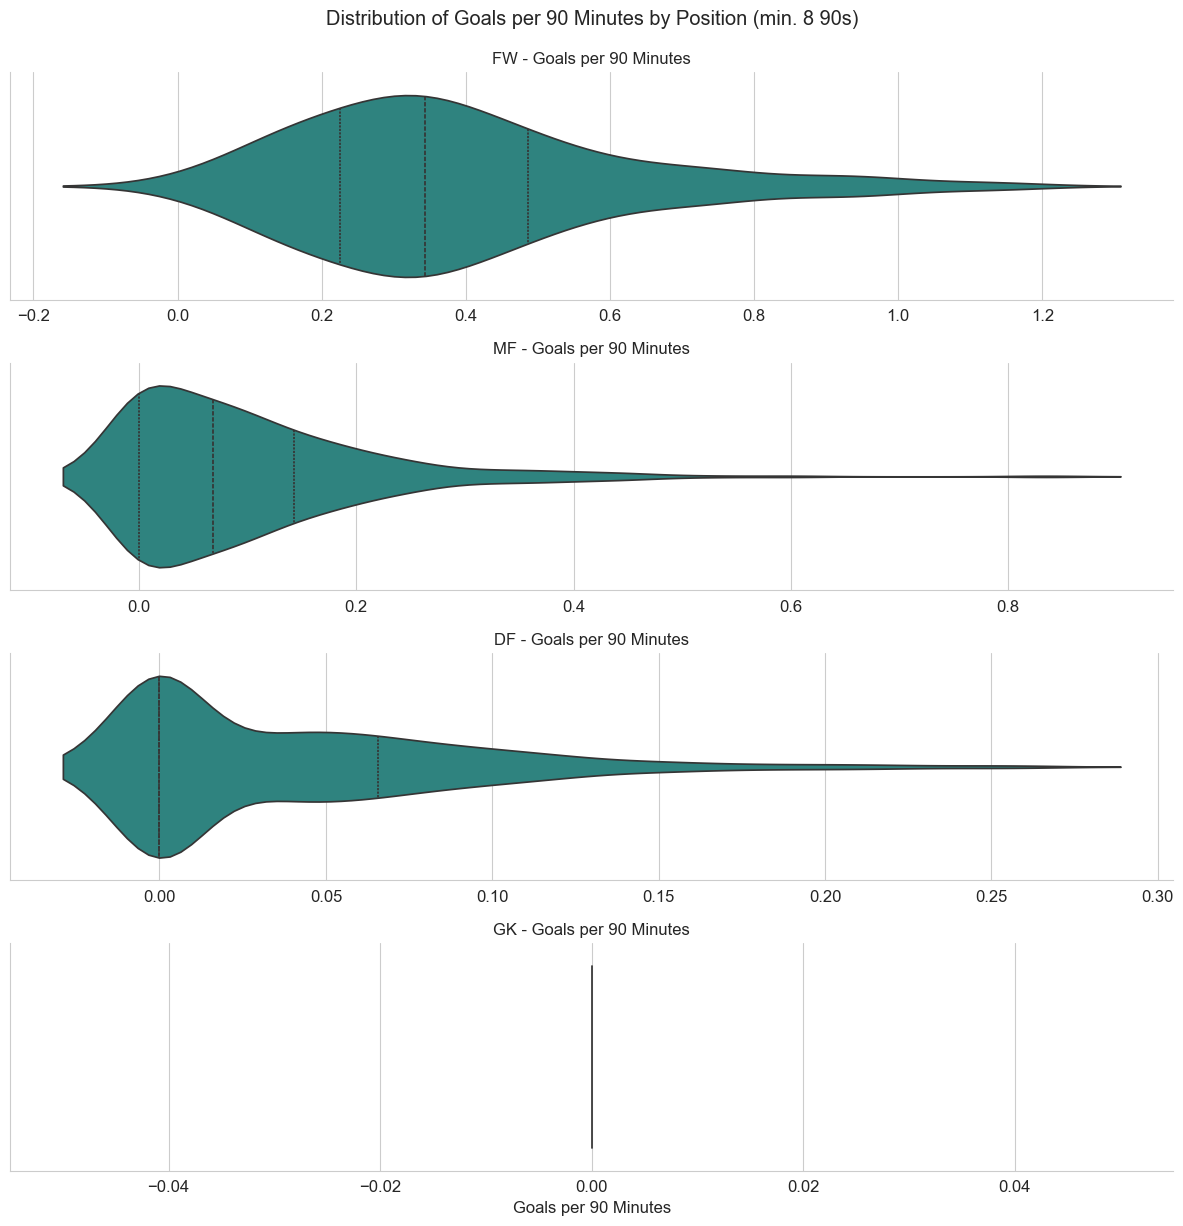

In [53]:
df_full['90s'] = pd.to_numeric(df_full['90s'], errors='coerce')
df_full['Gls'] = pd.to_numeric(df_full['Gls'], errors='coerce')

df_full['Gls_per_90'] = df_full['Gls'] / df_full['90s']

min_90s_pos_analysis = 8
df_positions_filtered = df_full[df_full['90s'] >= min_90s_pos_analysis].copy()
df_positions_filtered.dropna(subset=['Gls_per_90', 'Pos'], inplace=True)

position_order = ['FW', 'MF', 'DF', 'GK']

df_positions_filtered['Pos'] = pd.Categorical(df_positions_filtered['Pos'], categories=position_order, ordered=True)

g_gls_pos = sns.FacetGrid(df_positions_filtered, row="Pos", height=3, aspect=4, sharex=False, row_order=position_order)

g_gls_pos.map(sns.violinplot, "Gls_per_90", palette="viridis", inner="quartile")

g_gls_pos.set_titles(row_template="{row_name} - Goals per 90 Minutes")
g_gls_pos.set_axis_labels("Goals per 90 Minutes", "")
plt.tight_layout()
plt.suptitle(f'Distribution of Goals per 90 Minutes by Position (min. {min_90s_pos_analysis} 90s)', y=1.02)
plt.show()

**Forwards (FW)**: Most forwards score between 0.2 and 0.5 goals per 90 minutes, with a long tail to the right, indicating that some elite forwards exceed this average.

**Midfielders (MF)**: The distribution is narrower and concentrated at lower values than forwards, mainly between 0.05 and 0.2 goals per 90 minutes.

**Defenders (DF)**: The distribution is highly concentrated around 0.0 goals per 90 minutes, with most defenders scoring very few goals. The right tail is very short, indicating that it is very rare for a defender to score more than 0.15 goals per 90 minutes.

**Goalkeepers (GK)**: The distribution is extremely narrow and centered precisely at 0.0 goals per 90 minutes. No goals from goalkeepers are observed in this sample, which is entirely expected given their defensive role.